#### Dataset Link = https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

## **Libraries**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

## **Loading Dataset**

In [80]:
data = pd.read_csv("transactionData.csv")
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-01 01:01:21,565399283797,fraud_Koepp-Witting,grocery_pos,312.81,Anthony,Allen,M,6993 Carr Lodge Apt. 311,Jordan Valley,...,42.8801,-117.2810,641,Economist,1993-11-24,c48f2efccb689f2daef9ebdb03e1edec,1370048481,42.663612,-117.720784,1
1,2019-09-12 12:49:41,4683638447911,fraud_Bogisich-Homenick,misc_net,909.75,Daniel,Boyd,M,8925 Nicholas Points,Egan,...,30.2510,-92.5002,1261,Broadcast presenter,1972-07-01,68f2b98cba5c4ae6b7ff3f701d0cdc69,1347454181,30.624785,-91.516167,1
2,2019-10-05 17:08:54,3520550088202337,fraud_Bechtelar-Rippin,food_dining,7.59,Micheal,Walters,M,15315 Vaughn Park Suite 356,Hovland,...,47.8342,-90.0476,272,Freight forwarder,2001-07-05,b832170811fa7ce7ec76d9af27adecd2,1349456934,48.077562,-89.625358,0
3,2019-09-05 13:34:08,343746486082492,fraud_Kilback Group,food_dining,3.41,Jeffrey,Munoz,M,836 Stephanie Union,Cedar,...,44.8605,-85.8138,3096,"Social research officer, government",1975-10-11,7bbb699e093e3fb7d16c96093e95d66f,1346852048,45.478485,-86.138856,0
4,2019-01-22 23:04:30,344709867813900,fraud_Gottlieb-Hansen,personal_care,17.52,Joanna,Hudson,F,2924 Bobby Trafficway,Sebring,...,27.4703,-81.4872,50835,Environmental consultant,1986-01-30,5666921b2c9a994021da1bdbb9aea908,1327273470,27.686765,-81.094488,1


In [81]:
data['is_fraud'].value_counts()

,count
is_fraud,
1,7506
0,7506


## **Description of Dataset**

In [82]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000
mean,4.145026e+17,299.517998,48731.356248,38.620164,-90.275251,9.051075e+04,1.348818e+09,38.612480,-90.275455,0.500000
std,1.301544e+18,373.915804,27126.671123,5.128513,14.084930,3.035544e+05,1.332573e+07,5.168227,14.105491,0.500017
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325402e+09,19.041880,-166.550779,0.000000
25%,1.800400e+14,20.497500,25442.000000,34.778900,-96.983700,7.430000e+02,1.337471e+09,34.896843,-96.989761,0.000000
50%,3.523898e+15,89.545000,47869.000000,39.405500,-87.410100,2.526000e+03,1.348876e+09,39.403182,-87.360104,0.500000
75%,4.642255e+15,477.102500,72042.000000,42.015800,-80.128400,2.112500e+04,1.359844e+09,41.991035,-80.168734,1.000000
max,4.992346e+18,6337.250000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371813e+09,67.510267,-67.027467,1.000000


In [83]:
data.describe(exclude='number')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012
unique,15006,693,14,352,480,2,977,889,51,493,962,15012
top,2020-02-21 23:02:22,fraud_Kilback LLC,grocery_pos,Christopher,Smith,F,561 Little Plain Apt. 738,Warren,TX,Materials engineer,1981-08-29,e15a5a170cd384d2e514f7b0231b605f
freq,2,72,2494,330,301,7835,38,57,1024,114,48,1


In [84]:
cols = data.columns
for col in cols:
    print(f"{col} has min value {data[col].min()} and max value {data[col].max()}")
    print("*"*45)

trans_date_trans_time has min value 2019-01-01 07:11:55 and max value 2020-06-21 11:11:31
*********************************************
cc_num has min value 60416207185 and max value 4992346398065154184
*********************************************
merchant has min value fraud_Abbott-Rogahn and max value fraud_Zulauf LLC
*********************************************
category has min value entertainment and max value travel
*********************************************
amt has min value 1.0 and max value 6337.25
*********************************************
first has min value Aaron and max value Zachary
*********************************************
last has min value Abbott and max value Zuniga
*********************************************
gender has min value F and max value M
*********************************************
street has min value 000 Jennifer Mills and max value 99736 Rose Shoals Apt. 504
*********************************************
city has min value Achille and max val

## **Exploratory Data Analysis**

In [85]:
import os

os.makedirs("plots", exist_ok=True)

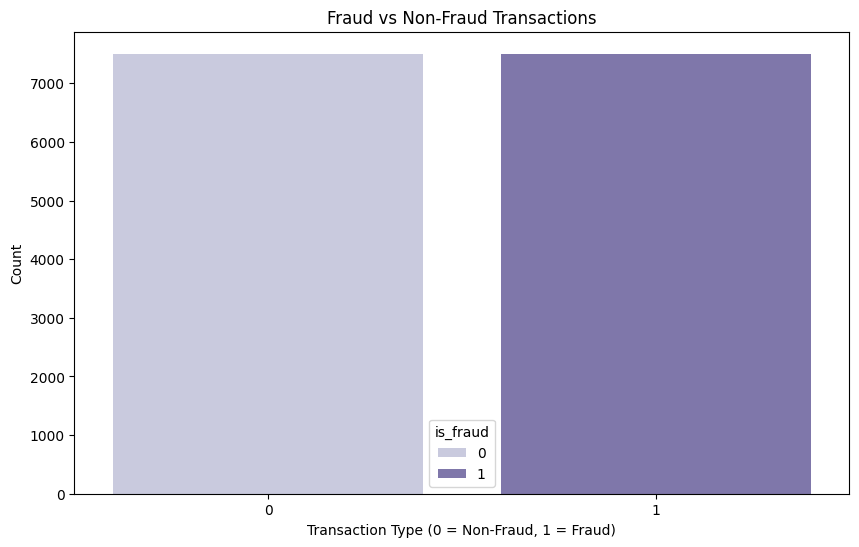

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['is_fraud'], hue=data["is_fraud"],palette="Purples")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.savefig("./plots/1_fraud_vs_nonfraud.png")
plt.show()

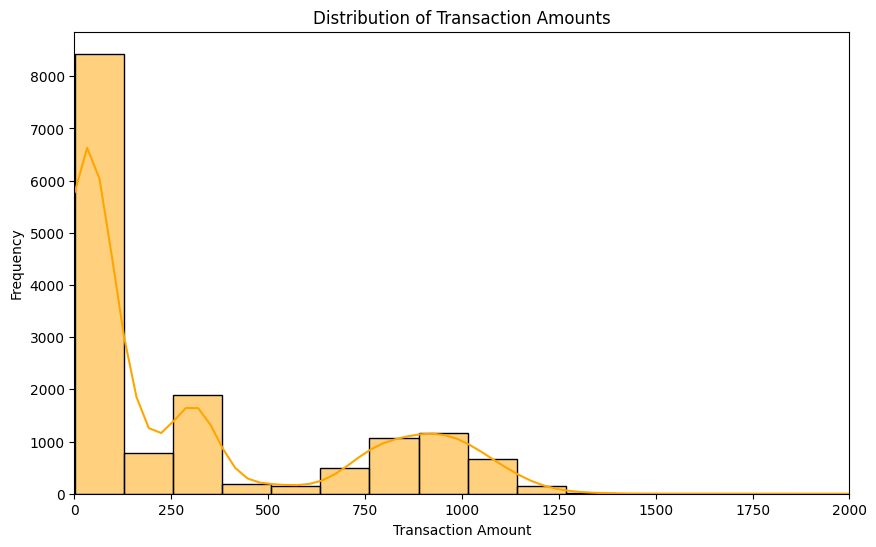

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(data["amt"], bins=50, kde=True, color="orange")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.xlim(0, 2000)
plt.savefig("./plots/2_dist_trans_amount.png")
plt.show()

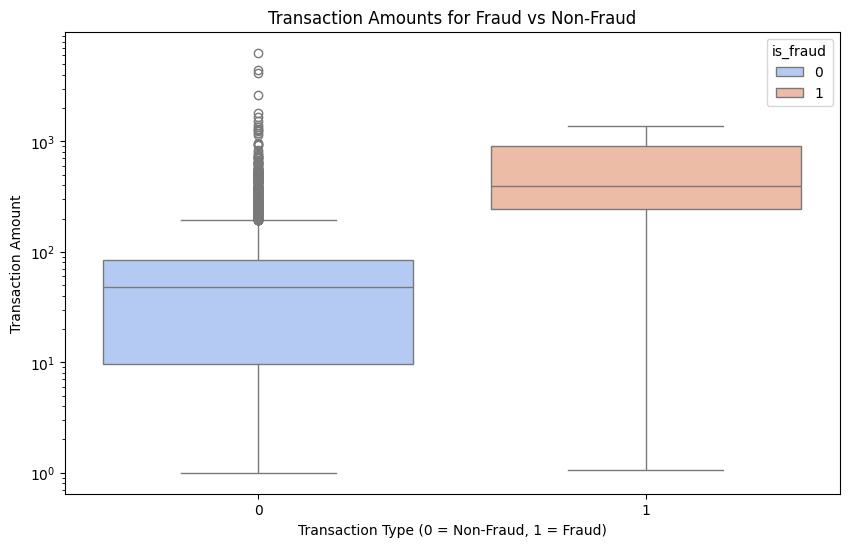

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="is_fraud", y="amt", data=data, hue="is_fraud",palette="coolwarm")
plt.title("Transaction Amounts for Fraud vs Non-Fraud")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # Use log scale to handle skewed data
plt.savefig("./plots/3_amount_fraud_vs_nonfraud.png")
plt.show()

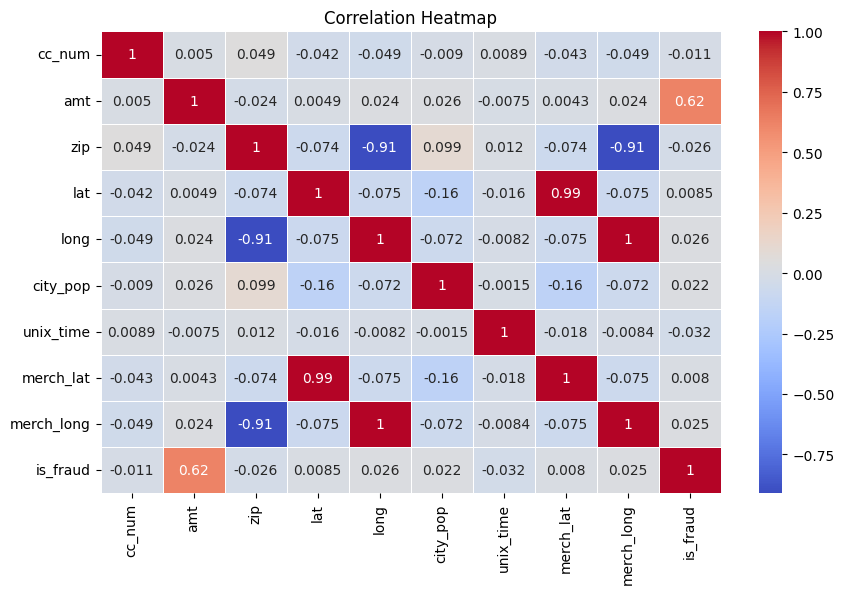

In [89]:
df_numeric = data.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(10, 6))
corr = df_numeric.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("./plots/4_heatmap.png")
plt.show()

## **Dropping unwanted columns**

In [90]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [91]:
cols_to_keep = ['amt', 'category', 'unix_time', 'state', 'is_fraud']

data = data[cols_to_keep]

data.head()

,amt,category,unix_time,state,is_fraud
0,312.81,grocery_pos,1370048481,OR,1
1,909.75,misc_net,1347454181,LA,1
2,7.59,food_dining,1349456934,MN,0
3,3.41,food_dining,1346852048,MI,0
4,17.52,personal_care,1327273470,FL,1


In [92]:
data['category'].unique()

array(['grocery_pos', 'misc_net', 'food_dining', 'personal_care',
       'shopping_net', 'misc_pos', 'shopping_pos', 'home',
       'gas_transport', 'entertainment', 'health_fitness', 'kids_pets',
       'grocery_net', 'travel'], dtype=object)

In [93]:
data['state'].unique()

array(['OR', 'LA', 'MN', 'MI', 'FL', 'VT', 'OH', 'TX', 'TN', 'IA', 'PA',
       'MO', 'NY', 'AZ', 'IL', 'WI', 'ND', 'MS', 'MD', 'AL', 'NC', 'KS',
       'OK', 'NJ', 'WY', 'VA', 'CA', 'WA', 'IN', 'DC', 'SC', 'SD', 'NH',
       'NE', 'MA', 'UT', 'KY', 'MT', 'ME', 'CO', 'WV', 'AK', 'NM', 'AR',
       'NV', 'ID', 'GA', 'RI', 'HI', 'CT', 'DE'], dtype=object)

In [94]:
data['hour'] = pd.to_datetime(data['unix_time'], unit='s').dt.hour
data['dayofweek'] = pd.to_datetime(data['unix_time'], unit='s').dt.dayofweek
data['is_weekend'] = data['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [95]:
data.head()

,amt,category,unix_time,state,is_fraud,hour,dayofweek,is_weekend
0,312.81,grocery_pos,1370048481,OR,1,1,5,1
1,909.75,misc_net,1347454181,LA,1,12,2,0
2,7.59,food_dining,1349456934,MN,0,17,4,0
3,3.41,food_dining,1346852048,MI,0,13,2,0
4,17.52,personal_care,1327273470,FL,1,23,6,1


In [96]:
data.drop('unix_time', axis=1, inplace=True)
data.head()

,amt,category,state,is_fraud,hour,dayofweek,is_weekend
0,312.81,grocery_pos,OR,1,1,5,1
1,909.75,misc_net,LA,1,12,2,0
2,7.59,food_dining,MN,0,17,4,0
3,3.41,food_dining,MI,0,13,2,0
4,17.52,personal_care,FL,1,23,6,1


## **Class Distribution**

In [97]:
data[data['is_fraud'] ==1 ].head(10)

,amt,category,state,is_fraud,hour,dayofweek,is_weekend
0,312.81,grocery_pos,OR,1,1,5,1
1,909.75,misc_net,LA,1,12,2,0
4,17.52,personal_care,FL,1,23,6,1
5,877.46,shopping_net,VT,1,22,5,1
6,9.14,misc_pos,OH,1,23,4,0
8,999.84,shopping_net,OR,1,12,3,0
12,11.03,gas_transport,PA,1,3,3,0
16,272.15,grocery_pos,AZ,1,0,2,0
17,1090.93,shopping_net,MO,1,0,0,0
18,777.95,shopping_pos,IA,1,2,3,0


In [98]:
data[data['is_fraud'] == 0].head(10)

,amt,category,state,is_fraud,hour,dayofweek,is_weekend
2,7.59,food_dining,MN,0,17,4,0
3,3.41,food_dining,MI,0,13,2,0
7,4.85,shopping_net,TX,0,11,0,0
9,1.65,shopping_pos,TX,0,5,0,0
10,47.08,home,TN,0,14,5,1
11,7.08,food_dining,IA,0,18,4,0
13,55.75,gas_transport,MO,0,11,3,0
14,51.81,entertainment,NY,0,21,3,0
15,41.22,gas_transport,OH,0,3,4,0
19,50.56,gas_transport,IL,0,0,3,0


## **Dependent and Independent Variables**

In [99]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

## **Preprocessing**

**Encoding**

In [100]:
import pickle

X = pd.get_dummies(X, columns=['category'], dtype=int)

# Extract only the one-hot encoded category columns (those starting with "category_")
saved_categories = [col for col in X.columns if col.startswith("category_")]

with open('saved_categories.pkl', 'wb') as f:
    pickle.dump(saved_categories, f)


In [101]:
X = pd.get_dummies(X, columns=['state'], dtype=int)
saved_states = [col for col in X.columns if col.startswith("state_")]

with open('saved_states.pkl', 'wb') as f:
    pickle.dump(saved_states, f)


**Train Test Split**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Scaling**

In [103]:
new_scaler = StandardScaler()
X_train_scaled = new_scaler.fit_transform(X_train)
X_test_scaled = new_scaler.transform(X_test)

## **Models**

In [104]:
allresults = []

**ANN Model**

In [105]:
# Build the ANN model

from tensorflow.keras import regularizers

ann_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [106]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

Epoch 1/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7103 - loss: 0.7073 - val_accuracy: 0.8531 - val_loss: 0.4392
Epoch 2/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8459 - loss: 0.4572 - val_accuracy: 0.8711 - val_loss: 0.3529
Epoch 3/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8619 - loss: 0.3930 - val_accuracy: 0.8731 - val_loss: 0.3304
Epoch 4/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8612 - loss: 0.3549 - val_accuracy: 0.8851 - val_loss: 0.3010
Epoch 5/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8807 - loss: 0.3138 - val_accuracy: 0.8954 - val_loss: 0.2860
Epoch 6/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8875 - loss: 0.2999 - val_accuracy: 0.9034 - val_loss: 0.2630
Epoch 7/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9007 - loss: 0.2818 - val_accuracy: 0.9274 - val_loss: 0.2475
Epoch 8/50
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9176 - loss: 0.2557 - val_accuracy: 0.

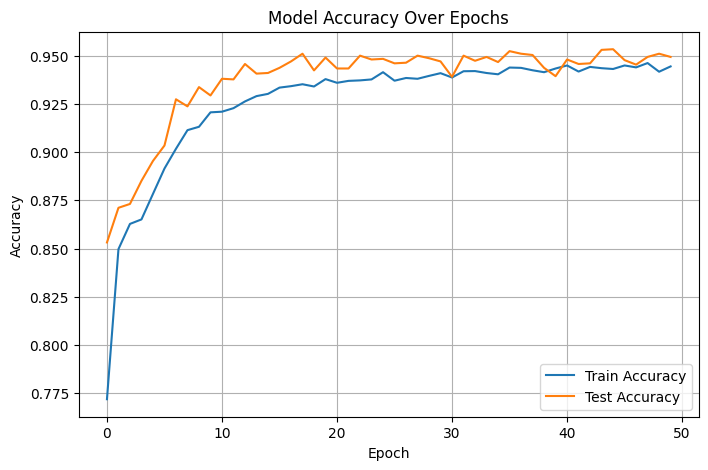

In [108]:
# Plot accuracy curve for train and test
history = ann_model.history.history if hasattr(ann_model, 'history') and hasattr(ann_model.history, 'history') else None

if history and 'accuracy' in history and 'val_accuracy' in history:
    plt.figure(figsize=(8, 5))
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Test Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Training history with accuracy not found. Please ensure you save the history object when calling model.fit().")

In [109]:
ann_y_pred = (ann_model.predict(X_test_scaled) > 0.5).astype(int)

ann_acc = accuracy_score(y_true=y_test, y_pred=ann_y_pred)
ann_precision = precision_score(y_test, ann_y_pred)
ann_recall = recall_score(y_test, ann_y_pred)
ann_f1 = f1_score(y_test, ann_y_pred)

print(f"Accuracy of ANN is {ann_acc}")
print(f"Precision Score is {ann_precision}")
print(f"Recall Score is {ann_recall}")
print(f"F1 Score is {ann_f1}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy of ANN is 0.9493839493839494
Precision Score is 0.9493670886075949
Recall Score is 0.9493670886075949
F1 Score is 0.9493670886075949


<Figure size 1000x600 with 0 Axes>

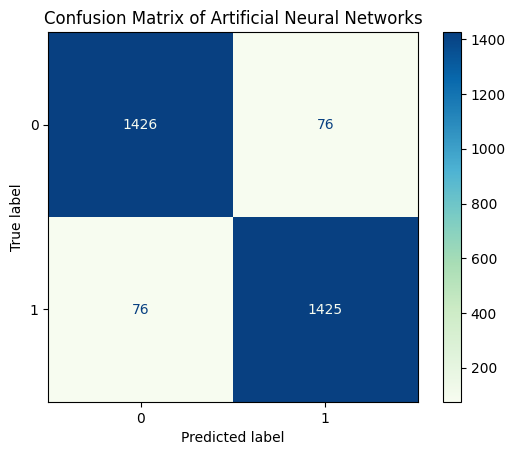

In [111]:
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, ann_y_pred, cmap='GnBu')
plt.title("Confusion Matrix of Artificial Neural Networks")
plt.savefig("plots/ann_cm.png")
plt.show()

In [113]:
ann_results = {
    'Model Name': "Artificial Neural Networks",
    'Model File': 'ann_model',
    'Accuracy': ann_acc,
    'Precision': ann_precision,
    'Recall': ann_recall,
    'F1 Score': ann_f1
}

allresults.append(ann_results)

### **predictions from our trained model**

In [114]:
# Get predictions from our trained model
y_pred_proba = ann_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate basic metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Accuracy: 0.949
Precision: 0.949
Recall: 0.949
F1 Score: 0.949


### **performance visualization**

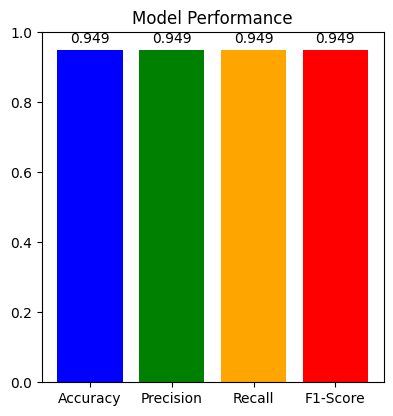

In [125]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center')


### **ROC curve analysis**

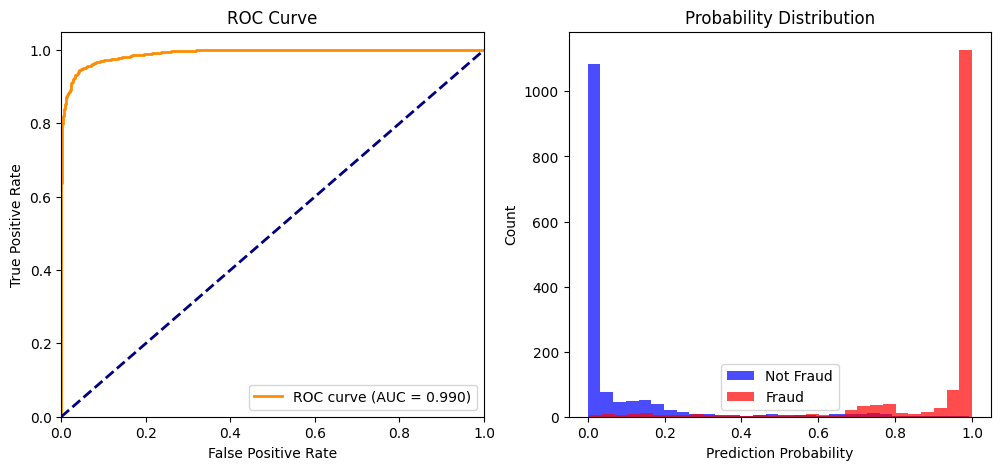

In [126]:
# ROC curve analysis
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Prediction probability distribution
plt.subplot(1, 2, 2)
plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Not Fraud', color='blue')
plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Probability Distribution')
plt.legend()

plt.show()


### **sample predictions**

In [127]:

sample_size = 10
random_indices = np.random.choice(len(X_test), sample_size, replace=False)

print("Sample Predictions:")
print("-" * 60)

for i, idx in enumerate(random_indices):
    actual = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
    prob = y_pred_proba[idx][0]
    predicted = 1 if prob > 0.5 else 0

    status = "✓" if actual == predicted else "✗"
    actual_label = "Fraud" if actual == 1 else "Not Fraud"
    pred_label = "Fraud" if predicted == 1 else "Not Fraud"

    print(f"Sample {i+1}: Actual={actual_label}, Predicted={pred_label}, Prob={prob:.3f} {status}")

print("-" * 60)
sample_accuracy = sum(1 for idx in random_indices if
                     (y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]) ==
                     (1 if y_pred_proba[idx][0] > 0.5 else 0)) / sample_size
print(f"Sample Accuracy: {sample_accuracy:.1%}")


Sample Predictions:
------------------------------------------------------------
Sample 1: Actual=Fraud, Predicted=Fraud, Prob=1.000 ✓
Sample 2: Actual=Fraud, Predicted=Fraud, Prob=0.998 ✓
Sample 3: Actual=Fraud, Predicted=Fraud, Prob=0.976 ✓
Sample 4: Actual=Fraud, Predicted=Fraud, Prob=0.772 ✓
Sample 5: Actual=Fraud, Predicted=Fraud, Prob=0.999 ✓
Sample 6: Actual=Fraud, Predicted=Fraud, Prob=1.000 ✓
Sample 7: Actual=Fraud, Predicted=Fraud, Prob=0.996 ✓
Sample 8: Actual=Not Fraud, Predicted=Not Fraud, Prob=0.000 ✓
Sample 9: Actual=Not Fraud, Predicted=Not Fraud, Prob=0.119 ✓
Sample 10: Actual=Not Fraud, Predicted=Not Fraud, Prob=0.026 ✓
------------------------------------------------------------
Sample Accuracy: 100.0%


### **Visualize sample predictions**

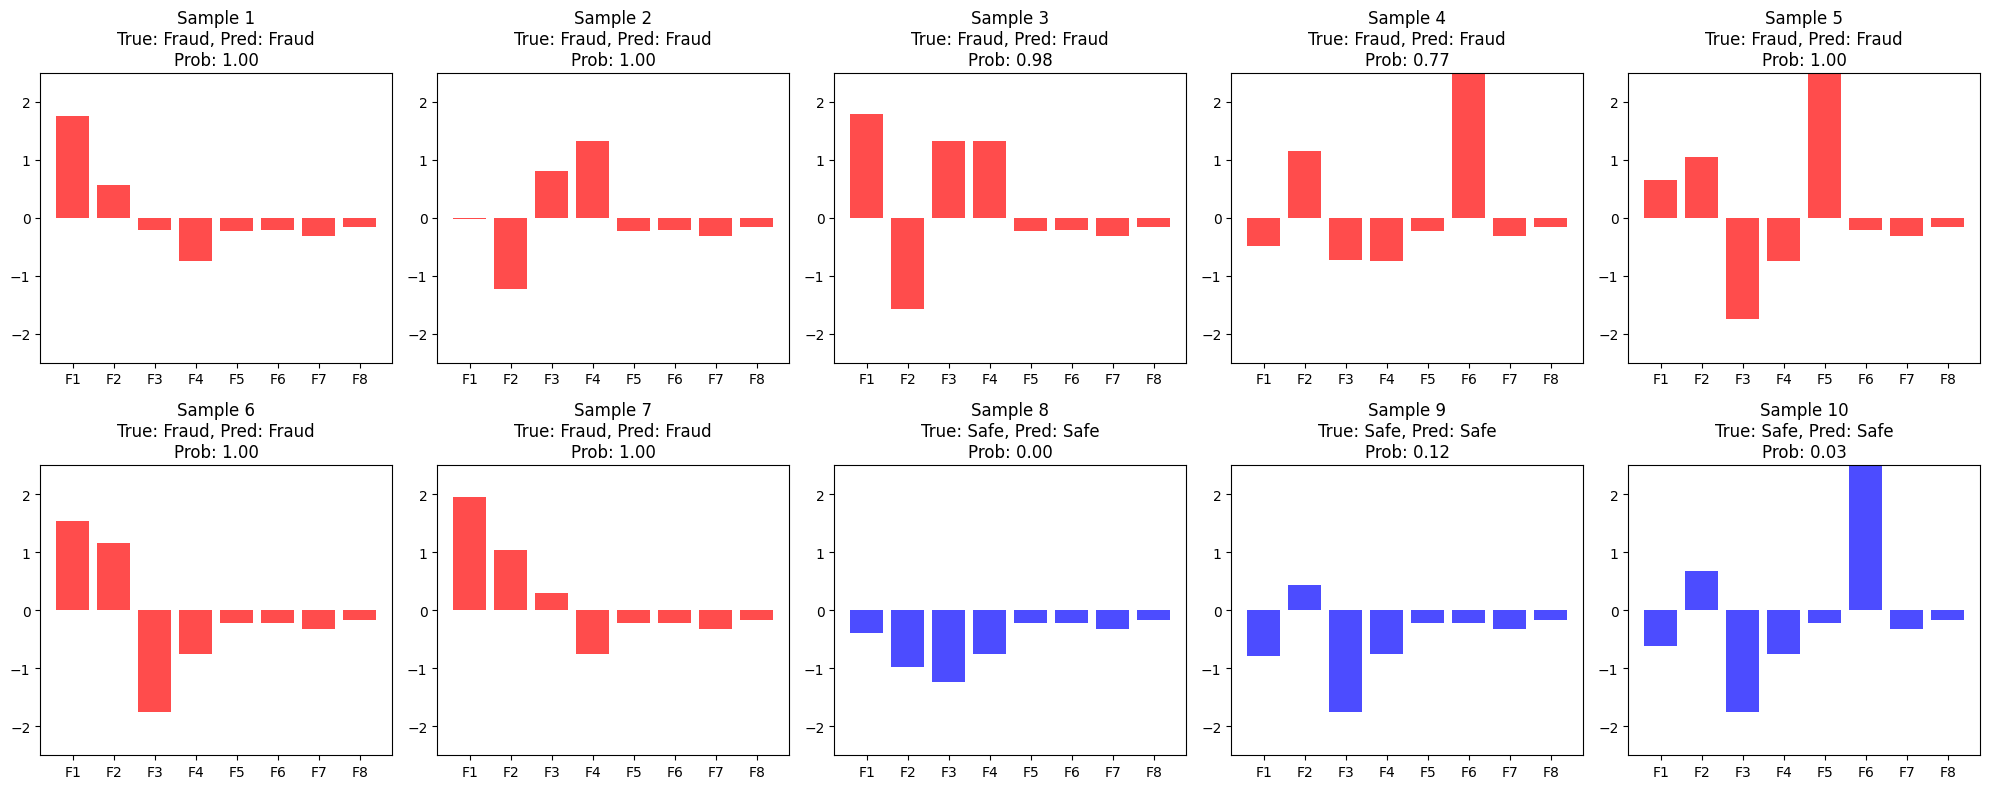

In [128]:

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    if i >= 10:
        break

    # Get sample data
    sample_features = X_test_scaled[idx][:8]  # First 8 features
    actual = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
    prob = y_pred_proba[idx][0]
    predicted = 1 if prob > 0.5 else 0

    # Create bar plot
    feature_names = [f'F{j+1}' for j in range(8)]
    color = 'red' if predicted == 1 else 'blue'
    axes[i].bar(feature_names, sample_features, color=color, alpha=0.7)

    # Set title with prediction info
    actual_label = "Fraud" if actual == 1 else "Safe"
    pred_label = "Fraud" if predicted == 1 else "Safe"
    axes[i].set_title(f'Sample {i+1}\nTrue: {actual_label}, Pred: {pred_label}\nProb: {prob:.2f}')
    axes[i].set_ylim(-2.5, 2.5)

plt.tight_layout()
plt.show()


In [119]:

correct_predictions = sum(1 for i in range(len(y_test)) if
                         (y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]) == y_pred[i])
total_predictions = len(y_test)

fraud_detected = sum(y_pred)
actual_fraud = sum(y_test)

print("="*50)
print("PREDICTION SUMMARY")
print("="*50)
print(f"Total predictions: {total_predictions}")
print(f"Correct predictions: {correct_predictions}")
print(f"Overall accuracy: {correct_predictions/total_predictions:.1%}")
print(f"Fraud cases detected: {fraud_detected}")
print(f"Actual fraud cases: {actual_fraud}")
print(f"Detection rate: {recall:.1%}")
print("="*50)


PREDICTION SUMMARY
Total predictions: 3003
Correct predictions: 2851
Overall accuracy: 94.9%
Fraud cases detected: [1501]
Actual fraud cases: 1501
Detection rate: 94.9%


In [124]:
import pickle
import pandas as pd

# Load the saved scaler, categories, and states
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
with open('saved_categories.pkl', 'rb') as f:
    loaded_categories = pickle.load(f)
with open('saved_states.pkl', 'rb') as f:
    loaded_states = pickle.load(f)


def check_fraud(transaction_data):
    # Ensure the input data is a pandas DataFrame
    if not isinstance(transaction_data, pd.DataFrame):
        transaction_data = pd.DataFrame([transaction_data])


    transaction_data = pd.get_dummies(transaction_data, columns=['category'], dtype=int)
    for col in loaded_categories:
        if col not in transaction_data.columns:
            transaction_data[col] = 0

    transaction_data = pd.get_dummies(transaction_data, columns=['state'], dtype=int)
    for col in loaded_states:
        if col not in transaction_data.columns:
            transaction_data[col] = 0

    for col in X_train.columns:
        if col not in transaction_data.columns:
            transaction_data[col] = 0
    transaction_data = transaction_data[X_train.columns] # Ensure the order is the same


    # Scale the input
    scaled_data = loaded_scaler.transform(transaction_data)
    # Get prediction
    prob = ann_model.predict(scaled_data)[0][0]
    is_fraud = prob > 0.5

    result = {
        'probability': prob,
        'is_fraud': is_fraud,
        'risk_level': 'High' if prob > 0.8 else 'Medium' if prob > 0.5 else 'Low'
    }
    return result

# Test the function
sample_transaction_data = {
    'amt': 100.0,
    'category': 'shopping_net',
    'state': 'CA',
    'hour': 10,
    'dayofweek': 1,
    'is_weekend': 0
}

result = check_fraud(sample_transaction_data)
print("Test prediction:")
print(f"Fraud probability: {result['probability']:.3f}")
print(f"Classification: {'Fraud' if result['is_fraud'] else 'Not Fraud'}")
print(f"Risk level: {result['risk_level']}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test prediction:
Fraud probability: 0.000
Classification: Not Fraud
Risk level: Low


### **Save the scaler**

In [123]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(new_scaler, f)